In [2]:
import sys

import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
data = pd.read_csv('datasets/football-events/events.csv', index_col=['id_event'])

In [8]:
data.shape

(941009, 21)

In [9]:
data.columns

Index(['id_odsp', 'sort_order', 'time', 'text', 'event_type', 'event_type2',
       'side', 'event_team', 'opponent', 'player', 'player2', 'player_in',
       'player_out', 'shot_place', 'shot_outcome', 'is_goal', 'location',
       'bodypart', 'assist_method', 'situation', 'fast_break'],
      dtype='object')

In [16]:
data.event_team.value_counts()

Juventus                      12054
Fiorentina                    11802
Real Madrid                   11644
AC Milan                      11633
AS Roma                       11482
Genoa                         11474
Lazio                         11362
Lille                         11347
Atalanta                      11288
Napoli                        11272
Sevilla                       11197
Atletico Madrid               11192
Marseille                     11166
Chievo Verona                 11164
Valencia                      11123
Internazionale                11112
Lyon                          11106
Barcelona                     10946
Montpellier                   10915
Toulouse                      10912
Udinese                       10787
Malaga                        10705
Athletic Bilbao               10703
Espanyol                      10662
Paris Saint-Germain           10626
Bordeaux                      10543
Real Sociedad                 10473
St Etienne                  

In [36]:
data.describe()

,sort_order,time,event_type,event_type2,side,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
count,941009.000000,941009.000000,941009.000000,214293.000000,941009.000000,227459.000000,228498.000000,941009.000000,467067.000000,229185.000000,941009.000000,229137.000000,941009.000000
mean,53.858826,49.663663,4.326575,12.233764,1.481170,5.733693,1.926555,0.025978,6.209073,1.624831,0.264332,1.281316,0.004876
std,32.014268,26.488977,2.995313,0.468850,0.499646,3.326100,0.797055,0.159071,5.421736,0.740400,0.655501,0.709394,0.069655
min,1.000000,0.000000,1.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,27.000000,27.000000,2.000000,12.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,53.000000,51.000000,3.000000,12.000000,1.000000,5.000000,2.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000
75%,79.000000,73.000000,8.000000,12.000000,2.000000,9.000000,3.000000,0.000000,11.000000,2.000000,0.000000,1.000000,0.000000
max,180.000000,100.000000,11.000000,15.000000,2.000000,13.000000,4.000000,1.000000,19.000000,3.000000,4.000000,4.000000,1.000000


In [37]:
data.isnull().sum().sort_values()

id_odsp               0
assist_method         0
is_goal               0
opponent              0
event_team            0
side                  0
fast_break            0
event_type            0
text                  0
time                  0
sort_order            0
player            61000
location         473942
player2          649699
bodypart         711824
situation        711872
shot_outcome     712511
shot_place       713550
event_type2      726716
player_out       889271
player_in        889294
dtype: int64

In [38]:
data[data.situation.isnull()]

,id_odsp,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
id_event,,,,,,,,,,,,,,,,,,,,,
UFot0hit2,UFot0hit/,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,dennis diekmeier,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
UFot0hit3,UFot0hit/,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,heiko westermann,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
UFot0hit4,UFot0hit/,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,sven bender,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
UFot0hit5,UFot0hit/,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
UFot0hit6,UFot0hit/,6,9,Hand ball by Jose Paolo Guerrero (Hamburg).,10,NaN,2,Hamburg SV,Borussia Dortmund,jose paolo guerrero,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
UFot0hit7,UFot0hit/,7,10,"Corner, Hamburg. Conceded by Lukasz Piszczek.",2,NaN,2,Hamburg SV,Borussia Dortmund,lukasz piszczek,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
UFot0hit8,UFot0hit/,8,11,Chris Lowe (Borussia Dortmund) wins a free kic...,8,NaN,1,Borussia Dortmund,Hamburg SV,chris lowe,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
UFot0hit9,UFot0hit/,9,11,Foul by Gojko Kacar (Hamburg).,3,NaN,2,Hamburg SV,Borussia Dortmund,gojko kacar,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
UFot0hit10,UFot0hit/,10,13,Foul by Gokhan Tore (Hamburg).,3,NaN,2,Hamburg SV,Borussia Dortmund,gokhan tore,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0


In [4]:
matches = pd.read_csv('datasets/football-events/ginf.csv', index_col=["id_odsp"])

In [6]:
matches.shape

(10112, 17)

In [7]:
matches.describe()

,season,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
count,10112.000000,10112.000000,10112.000000,10112.000000,10112.000000,10112.000000,977.000000,977.000000,977.000000,977.000000
mean,2014.290249,1.548062,1.154964,2.930120,4.278434,5.537545,2.046817,2.105629,1.942917,2.063941
std,1.610074,1.309591,1.142596,2.370135,1.863643,5.700485,0.367062,0.536646,0.211102,0.251276
min,2012.000000,0.000000,0.000000,1.060000,1.910000,1.110000,1.140000,1.420000,1.410000,1.440000
25%,2013.000000,1.000000,0.000000,1.760000,3.430000,2.740000,1.790000,1.780000,1.800000,1.870000
50%,2014.000000,1.000000,1.000000,2.270000,3.680000,3.860000,2.030000,1.970000,1.920000,2.050000
75%,2016.000000,2.000000,2.000000,3.080000,4.300000,6.000000,2.280000,2.270000,2.050000,2.200000
max,2017.000000,10.000000,9.000000,46.000000,35.000000,81.000000,3.400000,7.500000,3.250000,3.460000


In [8]:
matches.columns

Index(['link_odsp', 'adv_stats', 'date', 'league', 'season', 'country', 'ht',
       'at', 'fthg', 'ftag', 'odd_h', 'odd_d', 'odd_a', 'odd_over',
       'odd_under', 'odd_bts', 'odd_bts_n'],
      dtype='object')

In [9]:
matches.isnull().sum().sort_values()

link_odsp       0
odd_a           0
odd_d           0
odd_h           0
ftag            0
at              0
fthg            0
country         0
season          0
league          0
date            0
adv_stats       0
ht              0
odd_bts      9135
odd_over     9135
odd_under    9135
odd_bts_n    9135
dtype: int64

In [14]:
help(matches.dropna)

Help on method dropna in module pandas.core.frame:

dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) method of pandas.core.frame.DataFrame instance
    Return object with labels on given axis omitted where alternately any
    or all of the data are missing
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, or tuple/list thereof
        Pass tuple or list to drop on multiple axes
    how : {'any', 'all'}
        * any : if any NA values are present, drop that label
        * all : if all values are NA, drop that label
    thresh : int, default None
        int value : require that many non-NA values
    subset : array-like
        Labels along other axis to consider, e.g. if you are dropping rows
        these would be a list of columns to include
    inplace : boolean, default False
        If True, do operation inplace and return None.
    
    Returns
    -------
    dropped : DataFrame
    
    Examples
    --------
    >>> df = pd.DataFr

In [15]:
matches.__dict__

{'_data': BlockManager
 Items: Index(['link_odsp', 'adv_stats', 'date', 'league', 'season', 'country', 'ht',
        'at', 'fthg', 'ftag', 'odd_h', 'odd_d', 'odd_a', 'odd_over',
        'odd_under', 'odd_bts', 'odd_bts_n'],
       dtype='object')
 Axis 1: Index(['UFot0hit/', 'Aw5DflLH/', 'bkjpaC6n/', 'CzPV312a/', 'GUOdmtII/',
        'lOpzwMkp/', 'M7PhlM2C/', 'QuWqjrYa/', 'UBZQ4smg/', 'Wn69eU5B/',
        ...
        'r5V5rw33/', 'trUaUcuk/', 'U7UC16b1/', 'UP9lzFAq/', 'vJy048Er/',
        'xAkY8l6R/', 'xSU9scI9/', 'xY7uZwOI/', 'YyeGxMX8/', 'z5L2OT5E/'],
       dtype='object', name='id_odsp', length=10112)
 FloatBlock: slice(10, 17, 1), 7 x 10112, dtype: float64
 IntBlock: [4, 8, 9], 3 x 10112, dtype: int64
 BoolBlock: slice(1, 2, 1), 1 x 10112, dtype: bool
 ObjectBlock: [0, 2, 3, 5, 6, 7], 6 x 10112, dtype: object,
 '_item_cache': {},
 '_loc': <pandas.core.indexing._LocIndexer at 0x7f1782e16da0>,
 'is_copy': None}

In [18]:
df = matches.dropna(axis=1, how='any')

In [19]:
df.isnull().sum().sort_values()

link_odsp    0
adv_stats    0
date         0
league       0
season       0
country      0
ht           0
at           0
fthg         0
ftag         0
odd_h        0
odd_d        0
odd_a        0
dtype: int64

In [23]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10112 entries, UFot0hit/ to z5L2OT5E/
Data columns (total 17 columns):
link_odsp    10112 non-null object
adv_stats    10112 non-null bool
date         10112 non-null object
league       10112 non-null object
season       10112 non-null int64
country      10112 non-null object
ht           10112 non-null object
at           10112 non-null object
fthg         10112 non-null int64
ftag         10112 non-null int64
odd_h        10112 non-null float64
odd_d        10112 non-null float64
odd_a        10112 non-null float64
odd_over     977 non-null float64
odd_under    977 non-null float64
odd_bts      977 non-null float64
odd_bts_n    977 non-null float64
dtypes: bool(1), float64(7), int64(3), object(6)
memory usage: 1.3+ MB


In [24]:
matches.ht.value_counts()

Swansea                       106
Stoke City                    106
Manchester Utd                106
Udinese                       106
Lazio                         106
Bordeaux                      106
St Etienne                    106
Tottenham                     106
Everton                       106
Arsenal                       106
Genoa                         106
Manchester City               106
Nice                          106
Juventus                      106
Chelsea                       106
Stade Rennes                  106
Napoli                        106
Sunderland                    106
Chievo Verona                 106
Lille                         106
AC Milan                      106
West Brom                     106
Espanyol                      105
Marseille                     105
Toulouse                      105
Lyon                          105
Liverpool                     105
Real Sociedad                 105
Fiorentina                    105
Montpellier   

In [25]:
matches[matches.ht == "RB Leipzig"]

,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
id_odsp,,,,,,,,,,,,,,,,,
MyGMlrVP/,/soccer/germany/bundesliga/rb-leipzig-dortmund...,True,2016-09-10,D1,2017,germany,RB Leipzig,Borussia Dortmund,1,0,6.00,4.42,1.66,1.67,2.53,1.74,2.25
GIBstBrN/,/soccer/germany/bundesliga/rb-leipzig-b-monche...,True,2016-09-21,D1,2017,germany,RB Leipzig,Borussia Monchengladbach,1,1,2.30,3.66,3.46,1.77,2.40,1.67,2.65
zs7k99C9/,/soccer/germany/bundesliga/rb-leipzig-augsburg...,True,2016-09-30,D1,2017,germany,RB Leipzig,FC Augsburg,2,1,1.80,3.84,5.50,2.12,1.88,1.98,1.93
ETmvGHPg/,/soccer/germany/bundesliga/rb-leipzig-werder-b...,True,2016-10-23,D1,2017,germany,RB Leipzig,Werder Bremen,3,1,1.63,4.50,6.20,1.67,2.45,1.71,2.30
Ycty9LZN/,/soccer/germany/bundesliga/rb-leipzig-mainz-Yc...,True,2016-11-06,D1,2017,germany,RB Leipzig,Mainz,3,1,1.64,4.15,6.52,1.92,2.05,1.95,2.02
6sa8e500/,/soccer/germany/bundesliga/rb-leipzig-schalke-...,True,2016-12-03,D1,2017,germany,RB Leipzig,Schalke 04,2,1,2.01,3.66,4.30,2.10,1.94,1.90,2.19
YVcOMsaa/,/soccer/germany/bundesliga/rb-leipzig-hertha-b...,True,2016-12-17,D1,2017,germany,RB Leipzig,Hertha Berlin,2,0,1.68,4.05,6.50,2.00,2.06,1.98,2.04
MBzzyYJ9/,/soccer/germany/bundesliga/rb-leipzig-eintrach...,True,2017-01-21,D1,2017,germany,RB Leipzig,Eintracht Frankfurt,3,0,1.73,3.80,6.34,2.31,1.76,2.20,1.76


In [26]:
results = df.copy()

In [27]:
results['Result'] = results.fthg - results.ftag

In [29]:
results.Result.describe()

count    10112.000000
mean         0.393097
std          1.788723
min         -9.000000
25%         -1.000000
50%          0.000000
75%          1.000000
max          8.000000
Name: Result, dtype: float64

In [30]:
pd.options.display.max_rows = 15

In [31]:
results

,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,Result
id_odsp,,,,,,,,,,,,,,
UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,2
Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,0
bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,2
CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,-1
GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,1
lOpzwMkp/,/soccer/germany/bundesliga-2011-2012/hertha-be...,True,2011-08-06,D1,2012,germany,Hertha Berlin,Nurnberg,0,1,2.06,3.75,3.95,-1
M7PhlM2C/,/soccer/france/ligue-1-2011-2012/brest-evian-t...,True,2011-08-06,F1,2012,france,Brest,Evian Thonon Gaillard,2,2,2.29,3.25,3.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UP9lzFAq/,/soccer/england/premier-league/southampton-lei...,True,2017-01-22,E0,2017,england,Southampton,Leicester City,3,0,1.86,3.68,5.36,3


In [63]:
X = results[['ht', 'at', 'odd_h', 'odd_d', 'odd_a']]

In [64]:
y = results['Result']

In [65]:
X

,ht,at,odd_h,odd_d,odd_a
id_odsp,,,,,
UFot0hit/,22,60,1.56,4.41,7.42
Aw5DflLH/,48,111,2.36,3.60,3.40
bkjpaC6n/,143,67,1.83,4.20,4.80
CzPV312a/,99,79,1.55,4.50,9.40
GUOdmtII/,27,138,2.50,3.40,3.45
lOpzwMkp/,63,96,2.06,3.75,3.95
M7PhlM2C/,25,47,2.29,3.25,3.85
...,...,...,...,...,...
UP9lzFAq/,120,73,1.86,3.68,5.36


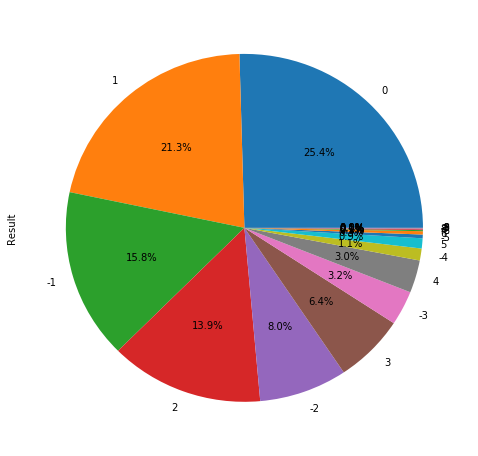

In [66]:
y.value_counts().plot.pie(figsize=(8, 8), autopct='%1.1f%%');

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [68]:
y_train.mean()

0.38343881856540085

In [69]:
y_test.mean()

0.42207278481012656

In [54]:
set(results['at']) - set(results.ht)

{'Karlsruher SC'}

In [56]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(results['at'])
le.classes_

array(['AC Ajaccio', 'AC Milan', 'AJ Auxerre', 'AS Monaco',
       'AS Nancy Lorraine', 'AS Roma', 'Alaves', 'Almeria', 'Angers',
       'Arsenal', 'Aston Villa', 'Atalanta', 'Athletic Bilbao',
       'Atletico Madrid', 'Barcelona', 'Bastia', 'Bayer Leverkusen',
       'Bayern Munich', 'Blackburn', 'Bologna', 'Bolton', 'Bordeaux',
       'Borussia Dortmund', 'Borussia Monchengladbach', 'Bournemouth',
       'Brest', 'Burnley', 'Caen', 'Cagliari', 'Cardiff', 'Carpi',
       'Catania', 'Celta Vigo', 'Cesena', 'Chelsea', 'Chievo Verona',
       'Cordoba', 'Crotone', 'Crystal Palace', 'Deportivo La Coruna',
       'Dijon FCO', 'Eibar', 'Eintracht Frankfurt', 'Elche', 'Empoli',
       'Espanyol', 'Everton', 'Evian Thonon Gaillard', 'FC Augsburg',
       'FC Cologne', 'FC Ingolstadt 04', 'Fiorentina',
       'Fortuna Dusseldorf', 'Frosinone', 'Fulham', 'GFC Ajaccio', 'Genoa',
       'Getafe', 'Granada', 'Guingamp', 'Hamburg SV', 'Hannover 96',
       'Hellas Verona', 'Hertha Berlin', 'Hull',

In [59]:
results['at'] = le.transform(results['at'])

In [61]:
results['ht'] = le.transform(results['ht'])

In [62]:
results

,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,Result
id_odsp,,,,,,,,,,,,,,
UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,22,60,3,1,1.56,4.41,7.42,2
Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,48,111,2,2,2.36,3.60,3.40,0
bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,143,67,2,0,1.83,4.20,4.80,2
CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,99,79,0,1,1.55,4.50,9.40,-1
GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,27,138,1,0,2.50,3.40,3.45,1
lOpzwMkp/,/soccer/germany/bundesliga-2011-2012/hertha-be...,True,2011-08-06,D1,2012,germany,63,96,0,1,2.06,3.75,3.95,-1
M7PhlM2C/,/soccer/france/ligue-1-2011-2012/brest-evian-t...,True,2011-08-06,F1,2012,france,25,47,2,2,2.29,3.25,3.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UP9lzFAq/,/soccer/england/premier-league/southampton-lei...,True,2017-01-22,E0,2017,england,120,73,3,0,1.86,3.68,5.36,3


In [73]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
regressor.score(X_train, y_train)

0.20393946540027941

In [75]:
predictions = regressor.predict(X_train)

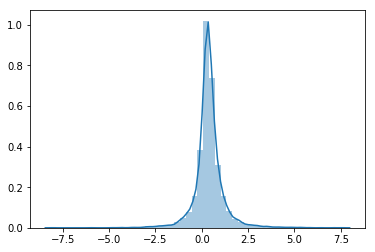

In [76]:
sns.distplot(predictions);

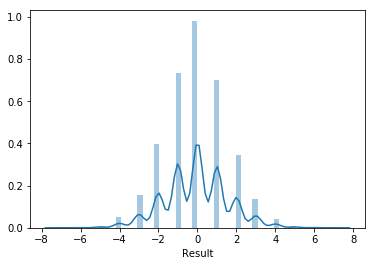

In [77]:
differences = (predictions - y_train).round(0)
sns.distplot(differences);

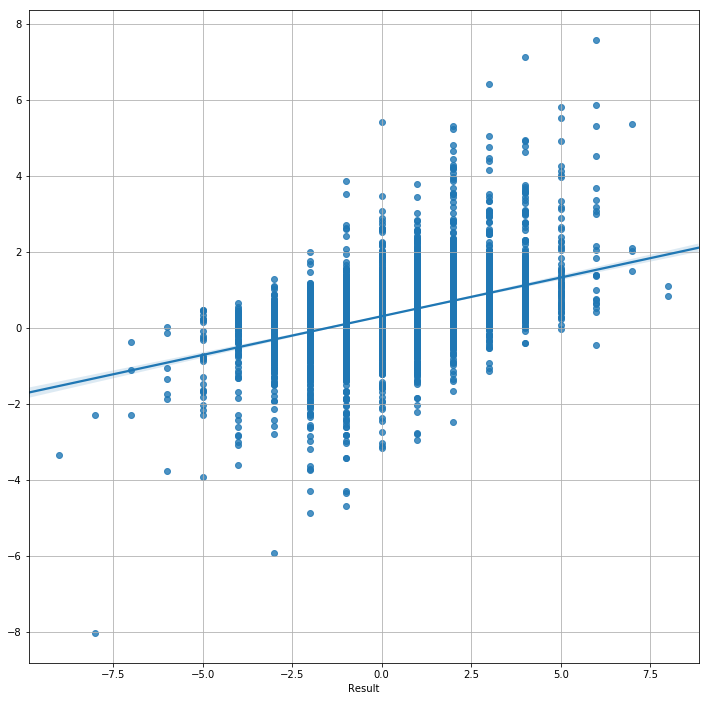

In [78]:
plt.figure(figsize=(12,12))
sns.regplot(y_train, predictions)
plt.grid(True)
plt.show()

Очевидно, това е лош подход. Линейната регресия няма да ни свърши работа тук. Даже се отказваме да предвиждаме точен резултат и ще предвиждаме само кой ще победи.

In [84]:
results['ht_win'] = results['Result'] > 0

In [85]:
results['ht_win']

id_odsp
UFot0hit/     True
Aw5DflLH/    False
bkjpaC6n/     True
CzPV312a/    False
GUOdmtII/     True
lOpzwMkp/    False
M7PhlM2C/    False
             ...  
UP9lzFAq/     True
vJy048Er/     True
xAkY8l6R/    False
xSU9scI9/     True
xY7uZwOI/     True
YyeGxMX8/    False
z5L2OT5E/     True
Name: ht_win, Length: 10112, dtype: bool

In [86]:
results['at_win'] = results['Result'] < 0

In [89]:
results['out'] = results['Result']/abs(results['Result'])

In [93]:
results['out'] = results['out'].fillna(0.0)

In [96]:
results['out']

id_odsp
UFot0hit/    1.0
Aw5DflLH/    0.0
bkjpaC6n/    1.0
CzPV312a/   -1.0
GUOdmtII/    1.0
lOpzwMkp/   -1.0
M7PhlM2C/    0.0
            ... 
UP9lzFAq/    1.0
vJy048Er/    1.0
xAkY8l6R/    0.0
xSU9scI9/    1.0
xY7uZwOI/    1.0
YyeGxMX8/    0.0
z5L2OT5E/    1.0
Name: out, Length: 10112, dtype: float64

In [97]:
y = results['out']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [99]:
model = LogisticRegression().fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.526503164557
test score:  0.545886075949


In [100]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.980353375527
test score:  0.481803797468


In [104]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(model, {'n_estimators': [120, 300, 500, 800, 1200],
                              'max_depth': [5, 8, 15, 25, 30]})
search.fit(X, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)search = GridSearchCV(model, {'n_estimators': [120, 300, 500, 800, 1200],
                              'max_depth': [5, 8, 15, 25, 30]})
search.fit(X, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

/home/betty/workspace/venv/ml/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/betty/workspace/venv/ml/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/betty/workspace/venv/ml/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/betty/

,rank_test_score,mean_test_score,params
4,1,0.534118,"{'n_estimators': 1200, 'max_depth': 5}"
1,2,0.533327,"{'n_estimators': 300, 'max_depth': 5}"
3,2,0.533327,"{'n_estimators': 800, 'max_depth': 5}"
2,4,0.533129,"{'n_estimators': 500, 'max_depth': 5}"
6,5,0.532634,"{'n_estimators': 300, 'max_depth': 8}"
0,6,0.532338,"{'n_estimators': 120, 'max_depth': 5}"
8,7,0.531942,"{'n_estimators': 800, 'max_depth': 8}"
5,8,0.531349,"{'n_estimators': 120, 'max_depth': 8}"
9,9,0.531250,"{'n_estimators': 1200, 'max_depth': 8}"
7,10,0.531151,"{'n_estimators': 500, 'max_depth': 8}"


In [103]:
model = RandomForestClassifier(random_state=0, n_estimators=120, max_depth=5).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.537710970464
test score:  0.542325949367


In [105]:
X_train

,ht,at,odd_h,odd_d,odd_a
id_odsp,,,,,
YB3WKQgA/,117,104,1.58,4.59,7.33
YaVKygkt/,22,81,1.40,5.80,9.20
CGJS6oLq/,15,133,3.08,3.06,3.00
KlavKuCR/,125,15,1.94,3.31,6.15
n5nTX8EM/,66,31,1.20,9.00,29.00
8hdm0hL1/,114,56,2.82,3.14,3.10
E7pVcG0p/,128,85,3.95,3.65,2.20
...,...,...,...,...,...
6B8Eyyp0/,79,124,2.10,3.45,5.04


In [114]:
results['goal_goal'] = results['fthg'] > 0 and results['ftag'] > 0

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [115]:
home_goal = results['fthg'] > 0

In [116]:
away_goal = results['fthg'] > 0

In [118]:
results['goal_goal'] = home_goal & away_goal

In [119]:
results['goal_goal']

id_odsp
UFot0hit/     True
Aw5DflLH/     True
bkjpaC6n/     True
CzPV312a/    False
GUOdmtII/     True
lOpzwMkp/    False
M7PhlM2C/     True
             ...  
UP9lzFAq/     True
vJy048Er/     True
xAkY8l6R/     True
xSU9scI9/     True
xY7uZwOI/     True
YyeGxMX8/    False
z5L2OT5E/     True
Name: goal_goal, Length: 10112, dtype: bool

In [120]:
y = results['goal_goal']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [122]:
model = LogisticRegression().fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.773074894515
test score:  0.767800632911


In [123]:
model = RandomForestClassifier(random_state=0, n_estimators=120, max_depth=5).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.776239451477
test score:  0.76582278481


In [124]:
search = GridSearchCV(model, {'n_estimators': [120, 300, 500, 800, 1200],
                              'max_depth': [5, 8, 15, 25, 30]})
search.fit(X, y)

pd.DataFrame(search.cv_results_)[['rank_test_score', 'mean_test_score', 'params']].sort_values(by='rank_test_score').head(10)

/home/betty/workspace/venv/ml/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/betty/workspace/venv/ml/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/betty/workspace/venv/ml/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/betty/

,rank_test_score,mean_test_score,params
0,1,0.769482,"{'n_estimators': 120, 'max_depth': 5}"
9,2,0.769383,"{'n_estimators': 1200, 'max_depth': 8}"
3,3,0.769185,"{'n_estimators': 800, 'max_depth': 5}"
2,4,0.769086,"{'n_estimators': 500, 'max_depth': 5}"
8,5,0.768987,"{'n_estimators': 800, 'max_depth': 8}"
4,6,0.768888,"{'n_estimators': 1200, 'max_depth': 5}"
7,6,0.768888,"{'n_estimators': 500, 'max_depth': 8}"
1,8,0.768790,"{'n_estimators': 300, 'max_depth': 5}"
5,8,0.768790,"{'n_estimators': 120, 'max_depth': 8}"
6,10,0.768691,"{'n_estimators': 300, 'max_depth': 8}"


In [125]:
def logistic_regression_features(X, model):
    plt.figure(figsize=(12,8))
    barplot = sns.barplot(x=X.columns, y=model.coef_[0], orient='vertical')
    plt.setp(barplot.get_xticklabels(), rotation=90)
    plt.grid(True)

In [126]:
model = LogisticRegression().fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.773074894515
test score:  0.767800632911


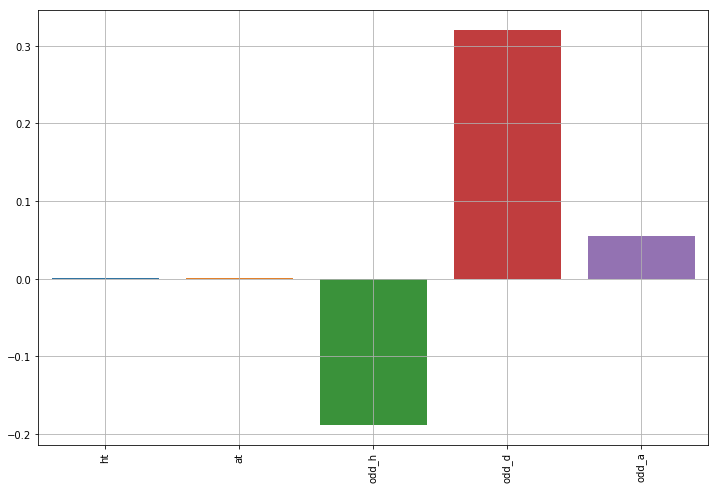

In [127]:
logistic_regression_features(X_train, model)

In [128]:
def random_forest_features(model, X):
    importances = model.feature_importances_
    std = np.std([model.feature_importances_ for tree in model.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 10))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns, rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [129]:
model = RandomForestClassifier(random_state=0, n_estimators=120, max_depth=5).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.776239451477
test score:  0.76582278481


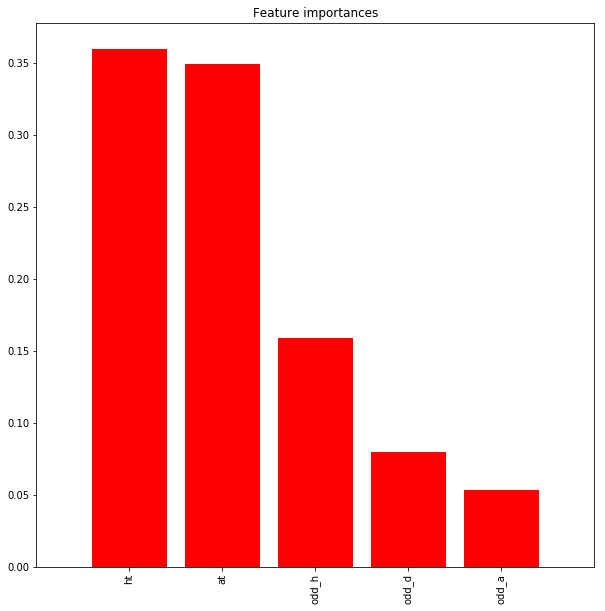

In [132]:
random_forest_features(model, X_train)

In [131]:
import numpy as np

In [133]:
X

,ht,at,odd_h,odd_d,odd_a
id_odsp,,,,,
UFot0hit/,22,60,1.56,4.41,7.42
Aw5DflLH/,48,111,2.36,3.60,3.40
bkjpaC6n/,143,67,1.83,4.20,4.80
CzPV312a/,99,79,1.55,4.50,9.40
GUOdmtII/,27,138,2.50,3.40,3.45
lOpzwMkp/,63,96,2.06,3.75,3.95
M7PhlM2C/,25,47,2.29,3.25,3.85
...,...,...,...,...,...
UP9lzFAq/,120,73,1.86,3.68,5.36


In [172]:
le.transform(['Napoli', 'Fiorentina', 'AC Milan', 'Bologna'])

array([91, 51,  1, 19])

In [183]:
new = pd.DataFrame([[91, 51, 1.45, 4.72, 7.25], [1, 9, 1, 1, 1]], columns=X.columns)
new

,ht,at,odd_h,odd_d,odd_a
0,91,51,1.45,4.72,7.25
1,1,9,1.00,1.00,1.00


In [184]:
model.predict(new)

array([ True,  True], dtype=bool)

In [147]:
from sklearn.model_selection import cross_val_predict
prediction = cross_val_predict(model, X, y, cv=3, n_jobs=3)
prediction

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [148]:
set(prediction)

{False, True}

In [149]:
import collections
collections.Counter(prediction)

Counter({False: 137, True: 9975})

In [150]:
results.goal_goal.describe()

count     10112
unique        2
top        True
freq       7790
Name: goal_goal, dtype: object

In [146]:
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          figsize=(9, 7)):
    matrix = confusion_matrix(y_true, y_pred)

    if normalize:
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=figsize)
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 size=int((figsize[0] / 10) * 38),
                 color="white" if matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

0.769481803797


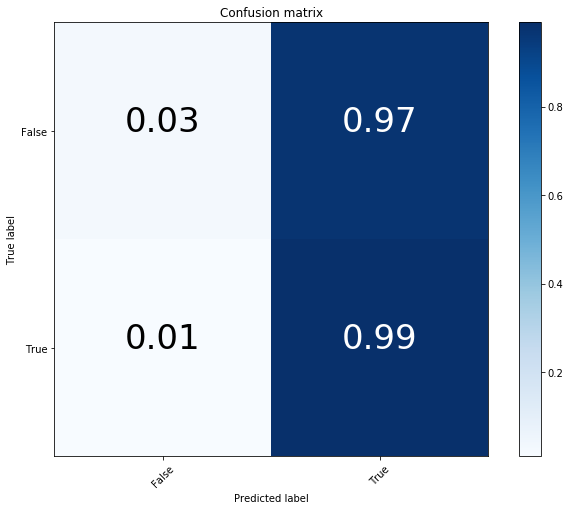

In [154]:
print(accuracy_score(y, prediction))
plot_confusion_matrix(y, prediction, classes=[False, True], normalize=True)

In [155]:
from sklearn.metrics import f1_score

f1_score(y_test, model.predict(X_test))

0.86714542190305199

In [157]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test), target_names=['No goals', 'Goal-Goal']))

             precision    recall  f1-score   support

   No goals       0.57      0.01      0.01       593
  Goal-Goal       0.77      1.00      0.87      1935

avg / total       0.72      0.77      0.67      2528



In [161]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("train score:", gbrt.score(X_train, y_train))
print("test score: ", gbrt.score(X_test, y_test))

train score: 0.786260548523
test score:  0.76621835443


0.76621835443
             precision    recall  f1-score   support

   No goals       0.53      0.03      0.06       593
  Goal-Goal       0.77      0.99      0.87      1935

avg / total       0.71      0.77      0.68      2528



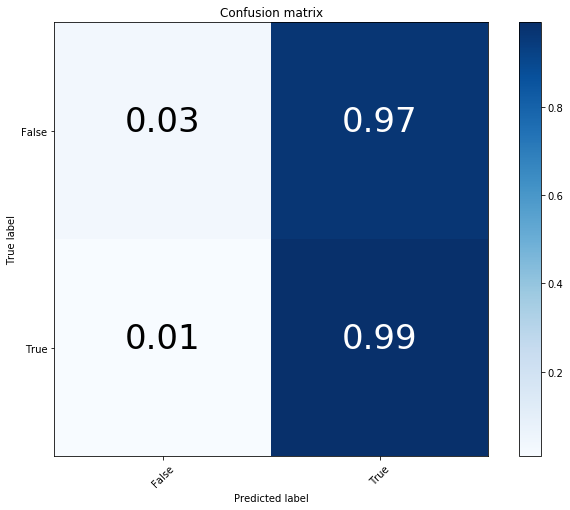

In [164]:
gbrt_prediction = gbrt.predict(X_test)
print(accuracy_score(y_test, gbrt_prediction))
plot_confusion_matrix(y_test, gbrt_prediction, classes=[False, True], normalize=True)
print(classification_report(y_test, gbrt_prediction, target_names=['No goals', 'Goal-Goal']))

In [169]:
frame = pd.DataFrame(
    np.hstack((
        gbrt.predict_proba(X_test).round(4),
        gbrt.decision_function(X_test).reshape(-1, 1).round(4),
        gbrt.predict(X_test).reshape(-1, 1),
    )),
    columns=['False %', 'True %', 'decision function', 'answer']
)
frame['color'] = np.array([False, True])[frame['answer'].astype(int)]
frame

,False %,True %,decision function,answer,color
0,0.4268,0.5732,0.2951,1.0,True
1,0.0761,0.9239,2.4966,1.0,True
2,0.1400,0.8600,1.8155,1.0,True
3,0.5799,0.4201,-0.3224,0.0,False
4,0.1462,0.8538,1.7649,1.0,True
5,0.1514,0.8486,1.7235,1.0,True
6,0.2068,0.7932,1.3444,1.0,True
...,...,...,...,...,...
2521,0.1013,0.8987,2.1831,1.0,True
2522,0.2095,0.7905,1.3278,1.0,True


In [196]:
for x in range(0, 10112):
    if prediction[x] == False:
        print(X.iloc[[x]])

            ht   at  odd_h  odd_d  odd_a
id_odsp                                 
ID5ukOkq/  103  107  17.72    8.6    1.2
            ht  at  odd_h  odd_d  odd_a
id_odsp                                
0OeqlZA6/  122  14  21.08    8.4   1.19
           ht  at  odd_h  odd_d  odd_a
id_odsp                               
WCuV5uLM/  61  17   9.64   5.01   1.43
           ht  at  odd_h  odd_d  odd_a
id_odsp                               
vFINOnwU/  58  14  27.63    9.0   1.17
           ht  at  odd_h  odd_d  odd_a
id_odsp                               
f57mXzy8/  12  14   11.5    5.9   1.36
           ht  at  odd_h  odd_d  odd_a
id_odsp                               
GxLdcda6/  48  17  22.08    8.8    1.2
           ht  at  odd_h  odd_d  odd_a
id_odsp                               
zLYOdF4J/  57  14   17.7   7.28   1.24
           ht  at  odd_h  odd_d  odd_a
id_odsp                               
AZjqUwoF/  45  14  16.18   8.19   1.22
           ht   at  odd_h  odd_d  odd_a
id_odsp        

           ht  at  odd_h  odd_d  odd_a
id_odsp                               
MBW6fTUM/  44  66  10.05   4.65   1.48
           ht  at  odd_h  odd_d  odd_a
id_odsp                               
lUAHKtNE/  42  17  18.17   8.12   1.27
           ht   at  odd_h  odd_d  odd_a
id_odsp                                
zqdmLL4I/   7  107   21.0    9.5   1.21
           ht  at  odd_h  odd_d  odd_a
id_odsp                               
vuHlzsva/  48  17   12.0   5.88   1.34
           ht  at  odd_h  odd_d  odd_a
id_odsp                               
SzGIqhjp/  59  99    9.6   4.95   1.47
           ht  at  odd_h  odd_d  odd_a
id_odsp                               
27DI0bhk/  28  66   10.0   5.42    1.4
           ht  at  odd_h  odd_d  odd_a
id_odsp                               
ruvgbQml/  33  91  11.07    5.5    1.4
           ht  at  odd_h  odd_d  odd_a
id_odsp                               
61VV9l4k/  15  99    9.5    4.6   1.51
           ht   at  odd_h  odd_d  odd_a
id_odsp              

In [195]:
X.iloc[[1]]

,ht,at,odd_h,odd_d,odd_a
id_odsp,,,,,
Aw5DflLH/,48,111,2.36,3.6,3.4
